# Etapa 01: Configuração do ambiente


1.   Instalar a biblioteca DeepFace
2.   Importar as ferramentas necessárias

In [25]:
!pip install deepface opencv-python matplotlib

In [26]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt



# Etapa 02: Carregamento da imagem

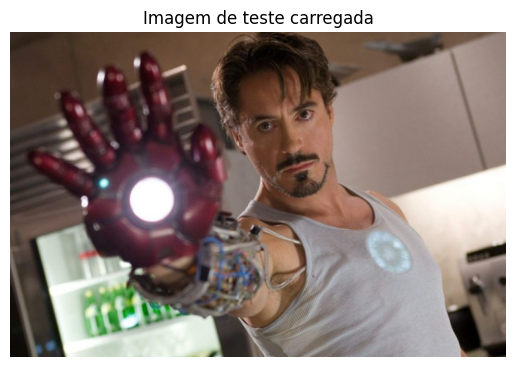

In [27]:
#imagem a ser testada
imagem_teste = "/content/minhaFoto4.png"

#Caminho da pasta das pessoas autorizadas
banco_img_autorizadas = "autorizados/" #Caminho para as pessoas/imgs que podem entrar

#Carregamento da imagem
imagem_bgr = cv2.imread(imagem_teste)

#Converter para visualizar a imagem corretamente
imagem_convertida = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2RGB)

#Visualização da imagem
plt.imshow(imagem_convertida)
plt.title("Imagem de teste carregada")
plt.axis("off")
plt.show()

# Etapa 03: Lógica paraclassificação com DeepFace

In [28]:
# Compara a imagem de teste com as fotos que estão no banco de autorizados
resultado = DeepFace.find(
    img_path=imagem_teste,        # imagem a ser verificada
    db_path=banco_img_autorizadas,    # banco de imagens permitidas
    model_name="VGG-Face",        # modelo de rede neural utilizado
    enforce_detection=False       # evita erro caso não encontre rosto na imagem
)

# O DeepFace pode retornar uma lista de DataFrames. Nesse caso, pegamos o primeiro.
if isinstance(resultado, list):
    resultado = resultado[0]

# Se o resultado não for vazio, significa que alguém autorizado foi reconhecido
if resultado is not None and not resultado.empty:
    texto = "AUTORIZADO"   # texto que será mostrado na imagem
    cor = (0, 255, 0)      # cor verde para indicar positivo
    print("AUTORIZADO")    # também mostra no console
else:
    texto = "NÃO AUTORIZADO" # texto caso não reconheça
    cor = (255, 0, 0)        # cor vermelha (em RGB)
    print("NÃO AUTORIZADO")  # mostra no console

25-12-02 00:06:13 - Searching /content/minhaFoto4.png in 1 length datastore
25-12-02 00:06:14 - find function duration 1.5263237953186035 seconds
NÃO AUTORIZADO


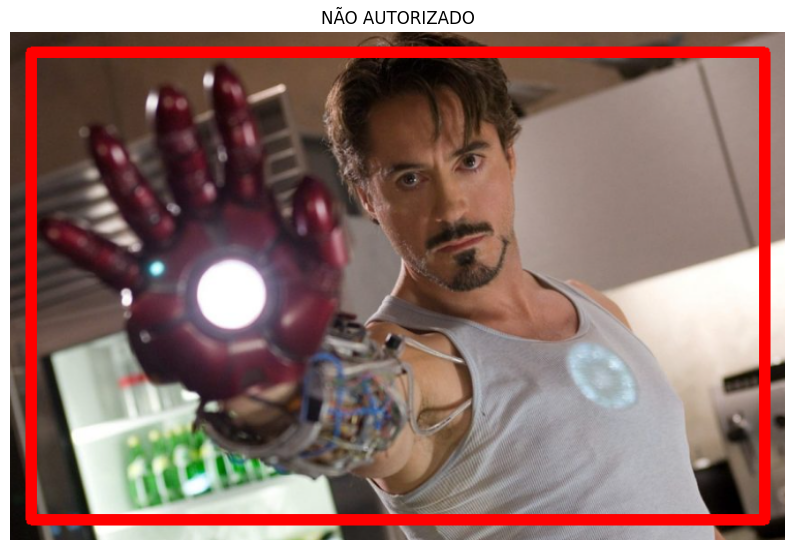

In [29]:
#Altura e largura da imagem original
altura, largura, _ = imagem_convertida.shape

#Desenhar o retângulo em volta da imagem com a cor definida de acordo com a validação
#(20, 20) e (largura - 20), (altura - 20) representam a borda inteira da nossa bounding box
#10 --> representa a espessura da linha verde ou vermelha
cv2.rectangle(imagem_convertida, (20, 20), (largura - 20, altura - 20), cor, 10)

plt.figure(figsize=(10,8))
plt.imshow(imagem_convertida)
plt.title(f"{texto}")
plt.axis("off")
plt.show()